# Combinatorial structures and statistics with SageMath

## Nadia Lafrenière
### Dartmouth College (🇺🇸) $\xrightarrow{🚌}$ Concordia University (🇨🇦) 

## EAUMP-ICTP School on Enumerative Combinatorics
### Arusha, Tanzania, July 25, 2023

# Combinatorial structures

In Per's lecture, you learned about many combinatorial structures:
- Permutations
- Set Partitions
- Subsets
- Integer compositions
- Integer partitions

In Hans's lecture yesterday, you learned about some lattice paths.

SageMath already knows about all these!

# Generating objects from a combinatorial structure

In Sage, to generate instances of a combinatorial stucture (that Sage knows of), one simply uses the word with a capital letter.

In [15]:
p = Permutation([2,1,4,5,3]); p

[2, 1, 4, 5, 3]

In [16]:
p.to_cycles()

[(1, 2), (3, 4, 5)]

And to generate all instances of the combinatorial structure, one simply marks the plural.

In [18]:
P = Permutations(5); P

Standard permutations of 5

For example, one can ask how many permutations of 5 there are.

One can either generate all permutations and then count them (using `len(P)`), or one could ask SageMath to count them. For every structure, this is achieved through asking for the cardinality of a set.

In [20]:
print(len(P))
print(P.cardinality())

120
120


Of course, if we know that the number of permutations of $n$ is $n!$, one can simply ask how large is $n!$.

In [30]:
factorial(5)

120

In general, we could learn how the cardinality is computed.

**Takeaway**: SageMath is also a repository for knowledge, since it lists the desired theorems.

`P.cardinality??` shows
```python
Source:   
    def cardinality(self):
        """
        Return the number of permutations of size `n`, which is `n!`.

        EXAMPLES::

            sage: Permutations(0).cardinality()
            1
            sage: Permutations(3).cardinality()
            6
            sage: Permutations(4).cardinality()
            24
        """
        return factorial(self.n)

```
meaning that to compute the number of permutations of $n$, Sage only computes $n!$, and does not generate all permutations. 

`cardinality`:
- is much much faster: the computer needs not to write all permutations, just to multiply numbers
- is much much better on memory: the computer only remembers a number, and does not need space to write down all permutations
- allows to count permutations of a (not so) large number, while listing them is not doable

One must be mindful of memory and time, and that it induces limitations. Even though `cardinality` is fast, listing all permutations is not always possible.

In [28]:
Permutations(30).cardinality()

265252859812191058636308480000000

In [29]:
len(Permutations(30))

OverflowError: cannot fit 'int' into an index-sized integer

30 is too large to list all 30! permutations  🤷‍♀️

## Other combinatorial structures

- Set Partitions -> `SetPartitions`  (takes either a set as a parameter, or `n` for the set partitions of $\{1,2,\ldots, n\}$.)
- Subsets -> `Subsets` (takes either a set as a parameter, or `n` for the set partitions of $\{1,2,\ldots, n\}$.)
- Integer compositions -> `Compositions` (takes a positive integer as a parameter) 
- Integer partitions -> `Patitions` (takes a positive integer as a parameter) 
- Lattice paths: It depends on what type. For example for Dyck Paths, one can use `DyckWords`.

## Structures with constraints

Very often, we don't need to generate or count all instances of a structure, but only a subset with a specific constraint. Often, we can specifiy these 


**Example** (from last lecture)

> How many (integer) partitions of 13 have maximal part of length 3?

All instances -> All partitions of 13

What we are interested in -> Partitions of 13 with maximal part of length 3

There are two options:
- Ask SageMath to generate only the partitions that have maximal part of length 3 (through an *argument* in the generator, passed as a parameter).
- Ask SageMath to generate all partitions of 13, then sort through those whose maximal part has length 3.

In [1]:
# Do the example in class:
# Ask SageMath to generate only the partitions that have maximal part of length 3
# through an *argument* in the generator, passed as a parameter.


In [5]:
# Do the example in class:
# Ask SageMath to generate only the partitions that have maximal part of length 3
# through an *argument* in the generator, passed as a parameter. Count the number of such partitions.
len(Partitions(13, max_part=3))

21

In [ ]:
# Do the example in class:
# Ask SageMath to generate all partitions of 13, then sort through those whose maximal part is at most 3.


In [6]:
# Do the example in class:
# Ask SageMath to generate all partitions of 13, then sort through those whose maximal part has length 3.
count = 0
for p in Partitions(13):
    in_set = True  # We first assume p is in th relevant set, and then 
    for part in p:
        if part > 3:
            in_set = False
        break
    if in_set:  # this is the same as if in_set == True
        count += 1  # increase 'count' by 1
count

21

Of course, we should get the same answer.

**Question**: What are all constraints that one can easily give to SageMath for partitions?

In [27]:
# Figuring it out with the notebook

In [10]:
# To do that, we check in the documentation. We see that there is a lot.
Partitions?

# Numbers that SageMath know

SageMath knows many combinatorial sequences

- Factorial, `factorial`
- Bell numbers, `bell_number`
- Catalan numbers, `catalan_number`
- Narayana numbers, `narayana_number`
- Eulerian numbers, `eulerian_number` (and Eulerian polynomial, `eulerian_polynomial`)
- Fibonacci numbers, `fibonacci`
- Stirling numbers, of the first kind `stirling_number1`, and of the second kind
  `stirling_number2`.
- Polygonal numbers, `polygonal_number`

To find that list, you can look up the documentation, or I looked up the internet for `combinatorial sequences sagemath`.

If you don't know some of these numbers, ask the documentation:

`bell_number?` shows
```
Signature:      bell_number(n, algorithm='flint', **options) -> 'Integer'
Docstring:     
   Return the n-th Bell number.

   This is the number of ways to partition a set of n elements into
   pairwise disjoint nonempty subsets.

   INPUT:

   * "n" -- a positive integer

   * "algorithm" -- (Default: "'flint'") any one of the following:

     * "'dobinski'" -- Use Dobinski's formula implemented in Sage

     * "'flint'" -- Wrap FLINT's "arith_bell_number"

     * "'gap'" -- Wrap GAP's "Bell"

     * "'mpmath'" -- Wrap mpmath's "bell"
        

```

[...] The documentation is very long.

The list of sequences above all comes from the `combinat` part of SageMath. Some of them are not referenced in the main part of SageMath, so you'll have to import the combinat part.

In [1]:
narayana_number?

Object `narayana_number` not found.


In [15]:
from sage.combinat.combinat import *
narayana_number(5,2)

20

The Narayana numbers, according to Wikipedia, count the number of Dyck Paths with $2n$ steps and $k+1$ peaks. Can we draw these paths?

In [28]:
# Only a few appear on the slides, they are all in the notebook
for path in DyckWords(5):
    if len(path.peaks()) == 3:
        print(ascii_art(path), '\n')

      /\  
     /  \ 
/\/\/    \ 

   /\  /\ 
/\/  \/  \ 

      /\  
   /\/  \ 
/\/      \ 

    /\    
   /  \   
/\/    \/\ 

    /\    
   /  \/\ 
/\/      \ 

    /\/\  
   /    \ 
/\/      \ 

 /\    /\ 
/  \/\/  \ 

 /\  /\   
/  \/  \/\ 

 /\  /\/\ 
/  \/    \ 

 /\/\  /\ 
/    \/  \ 

      /\  
 /\/\/  \ 
/        \ 

    /\    
 /\/  \   
/      \/\ 

    /\    
 /\/  \/\ 
/        \ 

    /\/\  
 /\/    \ 
/        \ 

  /\      
 /  \     
/    \/\/\ 

  /\      
 /  \/\   
/      \/\ 

  /\      
 /  \/\/\ 
/        \ 

  /\/\    
 /    \   
/      \/\ 

  /\/\    
 /    \/\ 
/        \ 

  /\/\/\  
 /      \ 
/        \ 



## Different ways to draw objects

For example, one might be interested in drawing the paths in different ways, or to copy it in a LaTeX document.

For most objects, there are multiple ways to draw them. Typically:
- sometimes: just naming it does the work.
- `plot()`: displays it in a standard way
- `pp()`: pretty print in ascii art
- `ascii_art()`: a simple way to represent it visually
- `latex` or `show`: returns the LaTeX code for adding it to your document

In [3]:
path = DyckWords(5).random_element();
path

In [4]:
show(path)  # latex source

[1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

In [5]:
# A more compact, yet visual representation (works for many structures)
ascii_art(path)

  /\      
 /  \/\/\ 
/        \

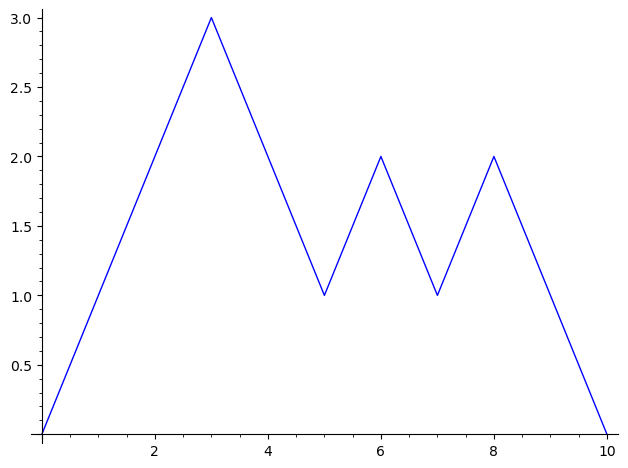

In [7]:
path.plot()  # draw it as a graphic

In [8]:
latex(path)  # also latex source

\vcenter{\hbox{$\begin{tikzpicture}[scale=1]
  \draw[dotted] (0, 0) grid (10, 3);
  \draw[rounded corners=1, color=black, line width=2] (0, 0) -- (1, 1) -- (2, 2) -- (3, 3) -- (4, 2) -- (5, 1) -- (6, 2) -- (7, 1) -- (8, 2) -- (9, 1) -- (10, 0);
\end{tikzpicture}$}}

In [9]:
path.pp()  # pp stands for "pretty print". Look how different it is!
# This is because a Dyck Path is also a lattice path that does not go below the diagonal.

       ___
     _| x 
 ___| x  .
| x x  . .
| x  . . .
|  . . . .

